2nd task started


In [ ]:

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('Churn_Modelling (2).csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().any()     

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
le=LabelEncoder()
df["RowNumber"]=le.fit_transform(df["RowNumber"])
df["CustomerId"]=le.fit_transform(df["CustomerId"])
df["Surname"]=le.fit_transform(df["Surname"])
df["CreditScore"]=le.fit_transform(df["CreditScore"])
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])
df["Age"]=le.fit_transform(df["Age"])
df["Tenure"]=le.fit_transform(df["Tenure"])
df["Balance"]=le.fit_transform(df["Balance"])
df["NumOfProducts"]=le.fit_transform(df["NumOfProducts"])
df["HasCrCard"]=le.fit_transform(df["HasCrCard"])
df["IsActiveMember"]=le.fit_transform(df["IsActiveMember"])
df["EstimatedSalary"]=le.fit_transform(df["EstimatedSalary"])
df["Exited"]=le.fit_transform(df["Exited"])


In [ ]:
df

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             0        2736     1115          228          0       0   24   
1             1        3258     1177          217          2       0   23   
2             2        2104     2040          111          0       0   24   
3             3        5435      289          308          0       0   21   
4             4        6899     1822          459          2       0   25   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9995        1599     1999          380          0       1   21   
9996       9996         161     1336          125          0       1   17   
9997       9997         717     1570          318          0       0   18   
9998       9998        4656     2345          381          1       1   24   
9999       9999        2497     2751          401          0       0   10   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2        0              0          1               1   
1          1      743              0          0               1   
2          8     5793              2          1               0   
3          1        0              1          0               0   
4          2     3696              0          1               1   
...      ...      ...            ...        ...             ...   
9995       5        0              1          1               0   
9996      10      124              0          1               1   
9997       7        0              0          0               1   
9998       3      427              1          1               0   
9999       4     4112              0          1               0   

      EstimatedSalary  Exited  
0                5068       1  
1                5639       0  
2                5707       1  
3                4704       0  
4                3925       0  
...               ...     ...  
9995             4827       0  
9996             5087       0  
9997             2062       1  
9998             4639       1  
9999             1878       0  

[10000 rows x 14 columns]

In [ ]:
x=df.iloc[:,0:13].values
y=df.iloc[:,13:14].values

In [ ]:
x,y

(array([[   0, 2736, 1115, ...,    1,    1, 5068],
        [   1, 3258, 1177, ...,    0,    1, 5639],
        [   2, 2104, 2040, ...,    1,    0, 5707],
        ...,
        [9997,  717, 1570, ...,    0,    1, 2062],
        [9998, 4656, 2345, ...,    1,    0, 4639],
        [9999, 2497, 2751, ...,    1,    0, 1878]]),
 array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]]))

In [ ]:
one=OneHotEncoder()
a=one.fit_transform(x[:,1:2]).toarray()
b=one.fit_transform(x[:,2:3]).toarray()
c=one.fit_transform(x[:,3:4]).toarray()
d=one.fit_transform(x[:,4:5]).toarray()
e=one.fit_transform(x[:,5:6]).toarray()
f=one.fit_transform(x[:,7:8]).toarray()
g=one.fit_transform(x[:,8:9]).toarray()
h=one.fit_transform(x[:,9:10]).toarray()
i=one.fit_transform(x[:,10:11]).toarray()
j=one.fit_transform(x[:,11:12]).toarray()
k=one.fit_transform(x[:,12:13]).toarray()
x=np.delete(x,[1,2,3,4,5,7,8,9,10,11,12],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,k,x),axis=1)

In [ ]:
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        2.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        2.400e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.997e+03,
        1.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.998e+03,
        2.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.999e+03,
        1.000e+01]])

In [ ]:
smt=SMOTE()
x_resample,y_resample=smt.fit_resample(x,y)

In [ ]:
x_resample,y_resample

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 2.40000000e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.30000000e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.00000000e+00, 2.40000000e+01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.48588564e+03, 1.51715361e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.38313165e+03, 2.46748645e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 3.55529231e+03, 2.33098942e+01]]),
 array([1, 0, 1, ..., 1, 1, 1]))

In [ ]:
x.shape,x_resample.shape

((10000, 29797), (15926, 29797))

In [ ]:
y.shape,y_resample.shape

((10000, 1), (15926,))

# 3rd task started

In [ ]:
df.describe()

RowNumber   CustomerId       Surname   CreditScore     Geography  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    4999.50000   4999.50000   1507.774200    259.584600      0.746300   
std     2886.89568   2886.89568    846.204311     96.496107      0.827529   
min        0.00000      0.00000      0.000000      0.000000      0.000000   
25%     2499.75000   2499.75000    773.750000    193.000000      0.000000   
50%     4999.50000   4999.50000   1542.000000    261.000000      0.000000   
75%     7499.25000   7499.25000   2238.250000    327.000000      1.000000   
max     9999.00000   9999.00000   2931.000000    459.000000      2.000000   

             Gender           Age        Tenure       Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.545700     20.920600      5.012800   2036.788100       0.530200   
std        0.497932     10.482065      2.892174   2125.232536       0.581654   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000     14.000000      3.000000      0.000000       0.000000   
50%        1.000000     19.000000      5.000000   1383.500000       0.000000   
75%        1.000000     26.000000      7.000000   3882.250000       1.000000   
max        1.000000     69.000000     10.000000   6381.000000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100      4998.621200      0.203700  
std        0.45584        0.499797      2886.711202      0.402769  
min        0.00000        0.000000         0.000000      0.000000  
25%        0.00000        0.000000      2498.750000      0.000000  
50%        1.00000        1.000000      4998.500000      0.000000  
75%        1.00000        1.000000      7498.250000      0.000000  
max        1.00000        1.000000      9998.000000      1.000000

<ipython-input-19-96e09bc64094>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure"])
<ipython-input-19-96e09bc64094>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

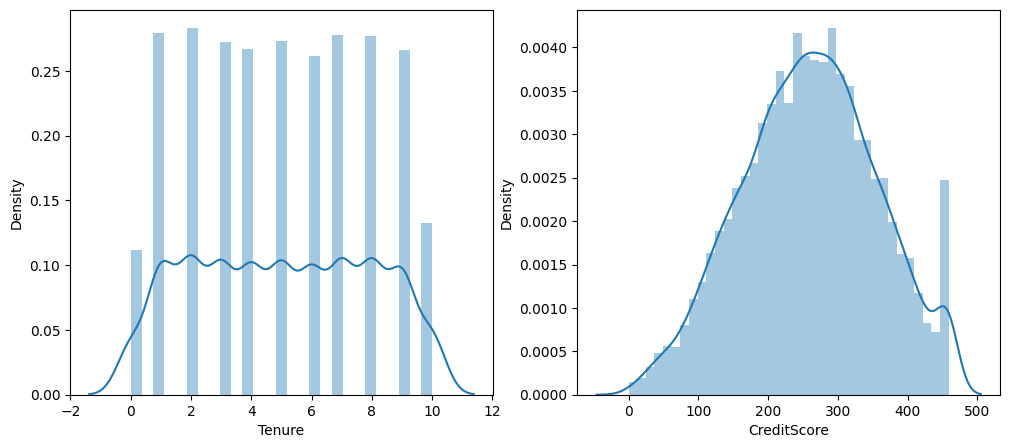

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df["Tenure"])
plt.subplot(1,2,2)
sns.distplot(df["CreditScore"])


<Axes: xlabel='Gender', ylabel='count'>

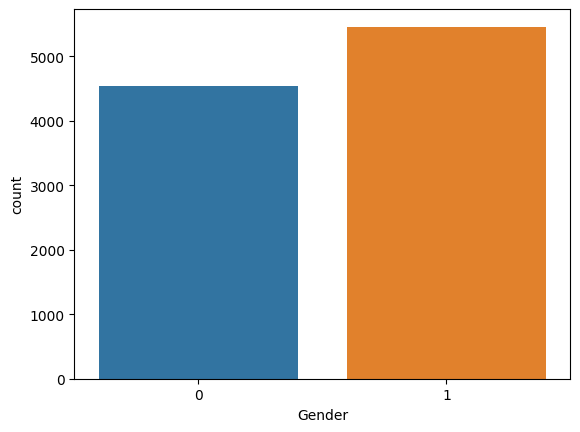

In [ ]:
sns.countplot(data=df, x="Gender")



Text(0.5, 1.0, 'Tenure VS Balance')

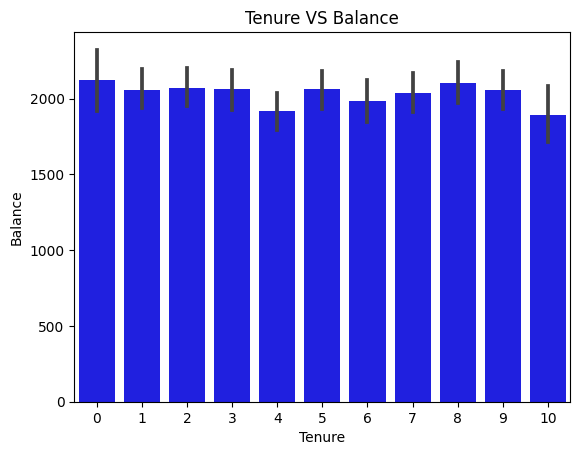

In [ ]:
sns.barplot(data=df, x="Tenure", y="Balance", color="b")
plt.title("Tenure VS Balance")

<Axes: >

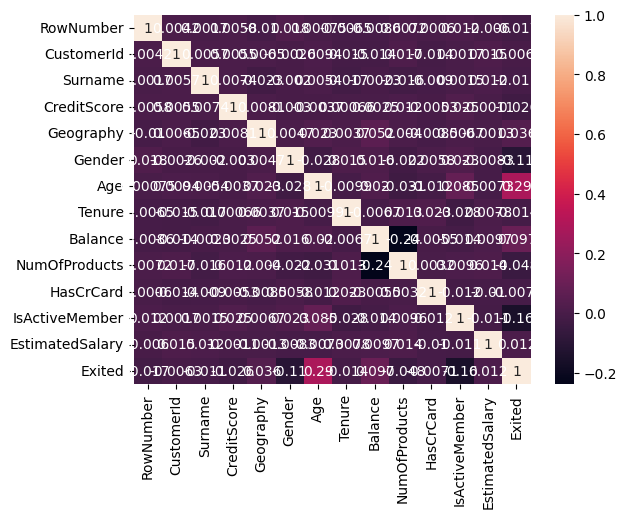

In [ ]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

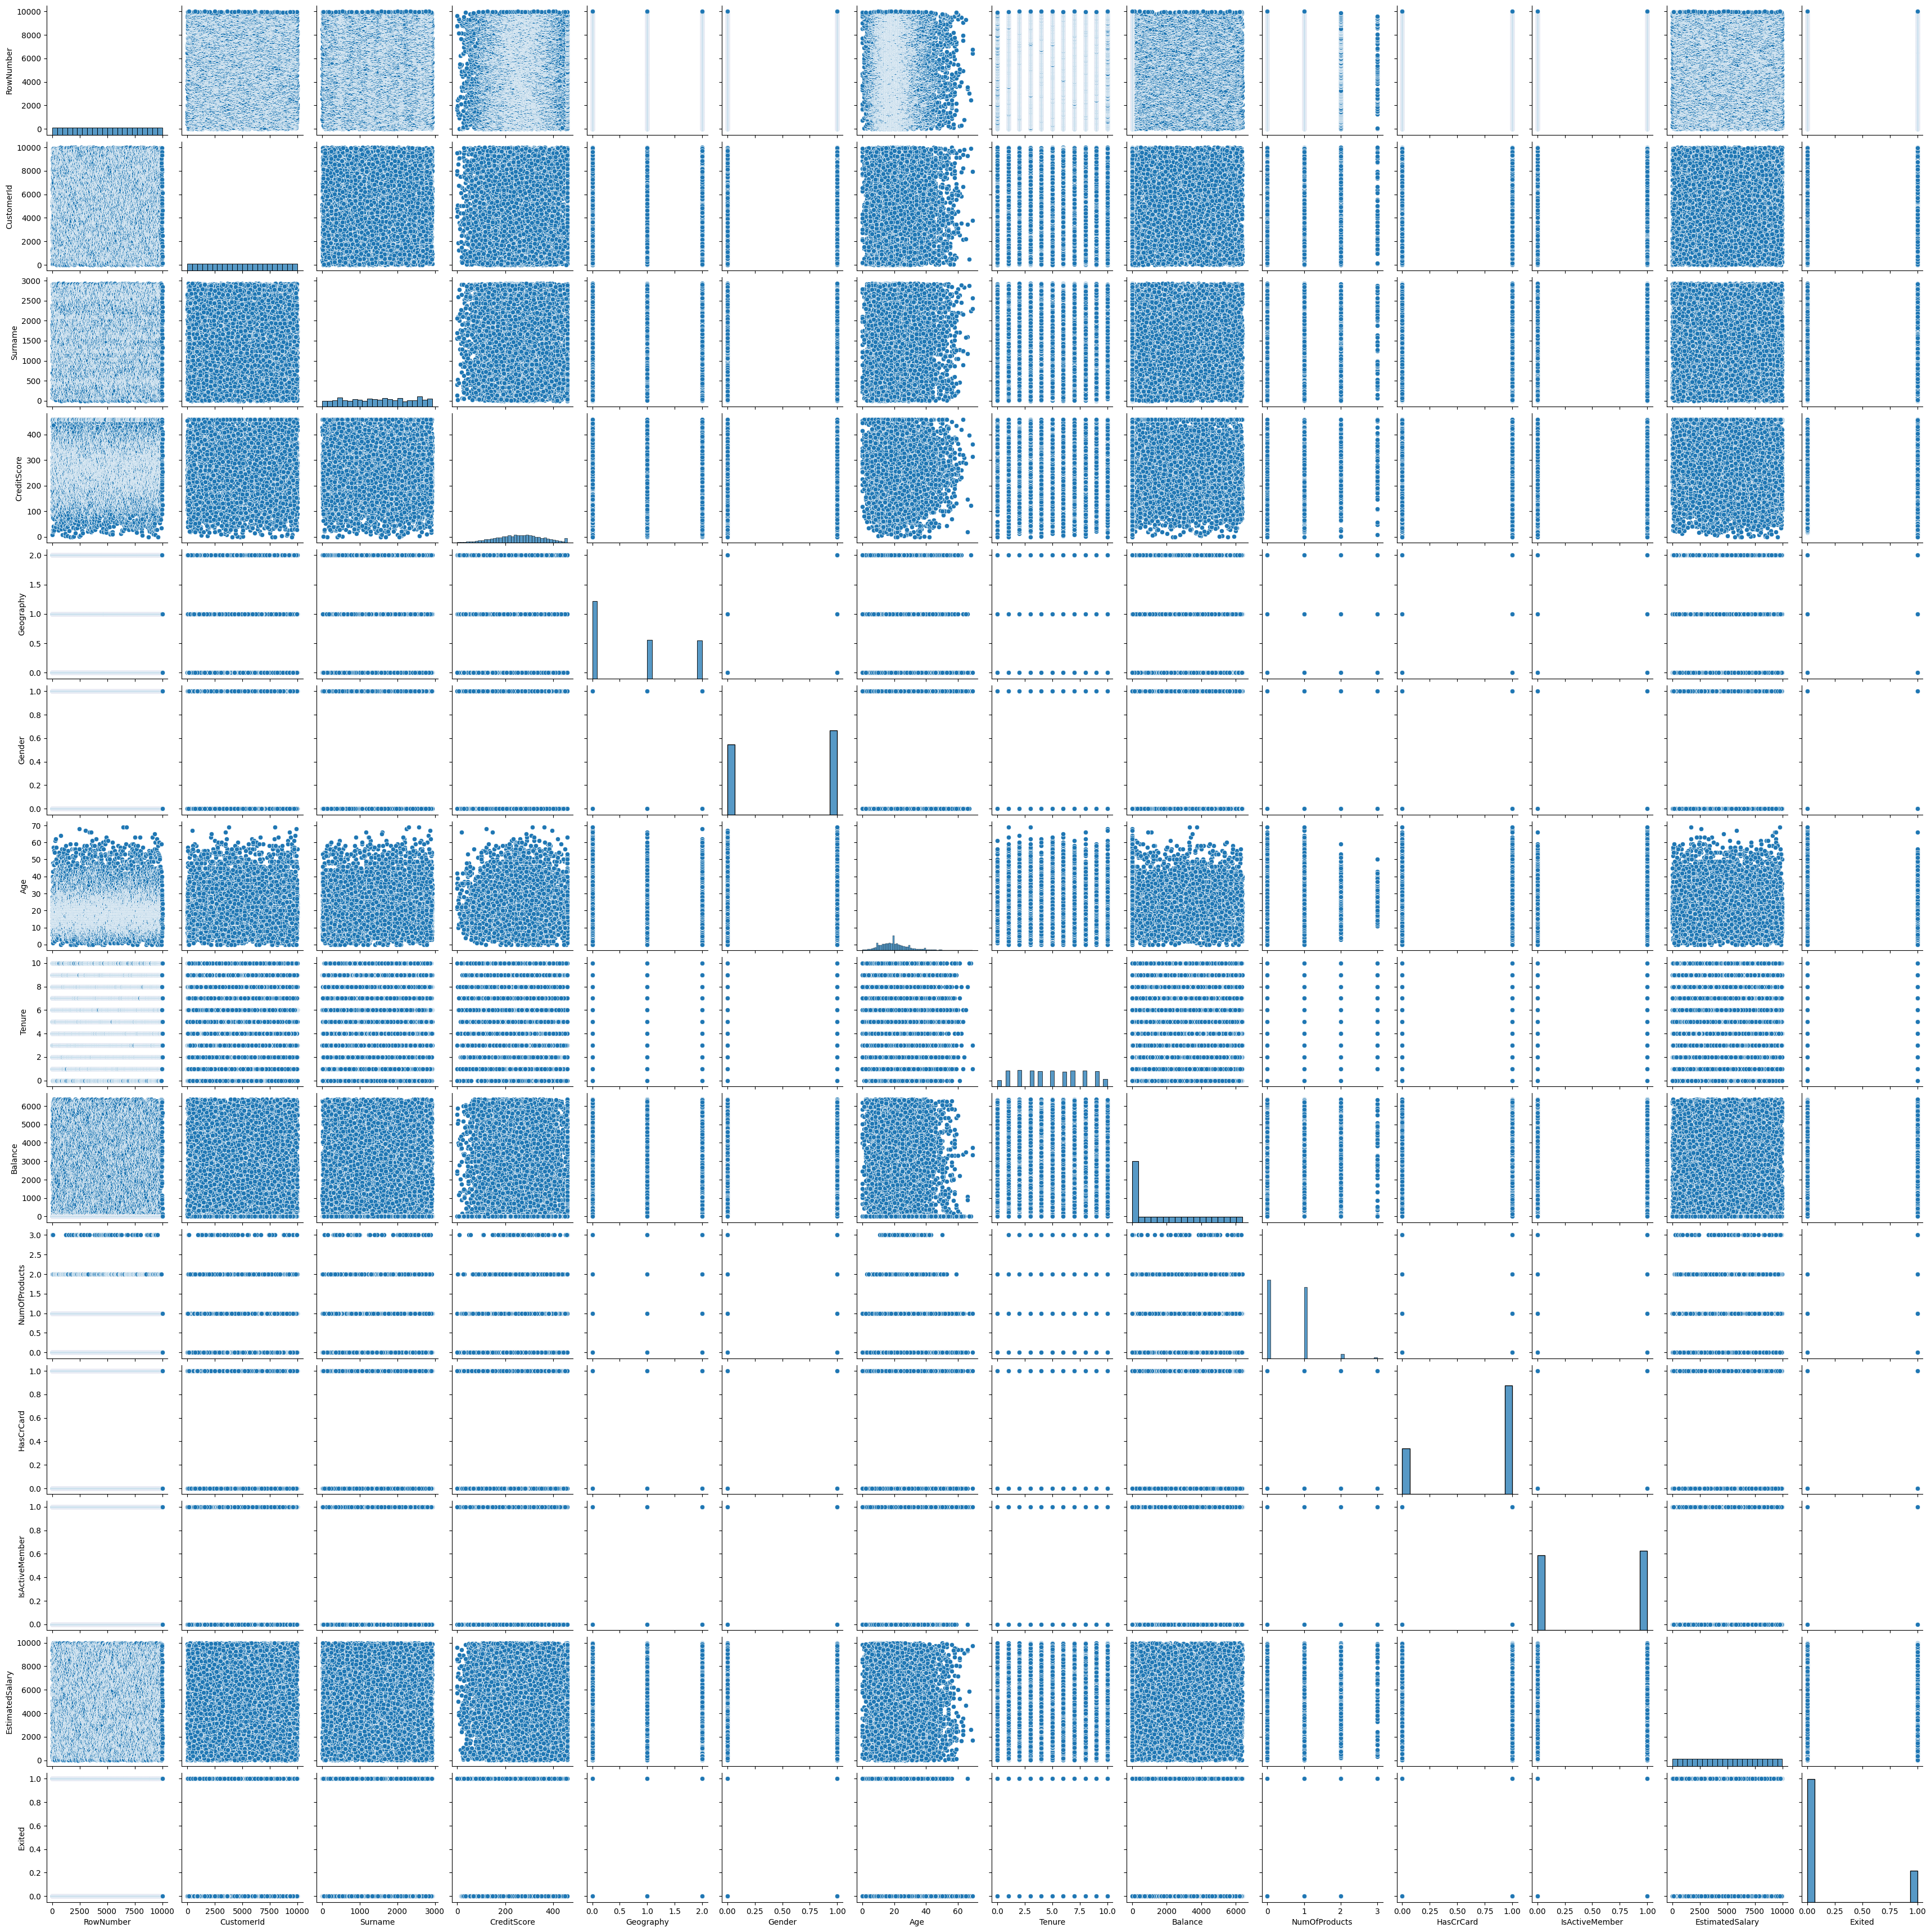

In [ ]:
sns.pairplot(data=df, markers=["^","v"], palette="inferno")

In [ ]:
x = df.drop(columns=["Exited"])
y = df["Balance"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# 4th task started

In [ ]:
x_train.shape

(8000, 13)

In [ ]:
def logreg(x_train,x_test,y_train,y_test):
  lr=LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr = lr.predict(x_train)

In [ ]:
#importing and building the Decision tree model
def logreg(x_train,x_test,y_train,y_test):
  lr=LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr = lr.predict(x_train)
  print(accuracy_score(y_lr_tr,y_train))
  yPred_lr = lr.predict(x_test)
  print(accuracy_score(yPred_lr,y_test))
  print("***Logistic Regression***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_lr))
  print("Classification Report")
  print(classification_report(y_test,yPred_lr))


      
         
           

In [ ]:
logreg(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.92075
0.3445
***Logistic Regression***
Confusion_Matrix
[[689   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       689
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
  dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr = dtc.predict(x_train)
  print(accuracy_score(y_dt_tr,y_train))
  yPred_dt = dtc.predict(x_test)
  print(accuracy_score(yPred_dt,y_test))
  print("***Decision Tree***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_dt))
  print("Classification Report")
  print(classification_report(y_test,yPred_dt))
  

In [ ]:
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.3445
***Decision Tree***
Confusion_Matrix
[[689   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       689
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          30       0.00      0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#importing and building the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
  rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr = rf.predict(x_train)
  print(accuracy_score(y_rf_tr,y_train))
  yPred_rf = rf.predict(x_test)
  print(accuracy_score(yPred_rf,y_test))
  print("***Random forest***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_rf))
  print("Classification Report")
  print(classification_report(y_test,yPred_rf))
  


In [ ]:
RandomForest(x_train,x_test,y_train,y_test)

0.99875
0.3445
***Random forest***
Confusion_Matrix
[[689   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       689
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#importing and building the KNN model
def KNN(x_train,x_test,y_train,y_test):
    Knn = KNeighborsClassifier()
    Knn.fit(x_train,y_train)
    y_Knn_tr = Knn.predict(x_train)
    print(accuracy_score(y_Knn_tr,y_train))
    yPred_Knn = Knn.predict(x_test)
    print(accuracy_score(yPred_Knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_Knn))
    print("Classification Report")
    print(classification_report(y_test,yPred_Knn))

                      

In [ ]:
KNN(x_train,x_test,y_train,y_test)

0.390375
0.34
***KNN***
Confusion_Matrix
[[680   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.99      0.73       689
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#importing and building the ramdom forest mode1
def svm(x_train, x_test, y_train, y_test):
    svm = SVC(kernel="linear")
    svm.fit(x_train, y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr, y_train))
    yPred_svm = svm.predict(x_test)
    print(accuracy_score(yPred_svm, y_test))
    print("***Support Vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test, yPred_svm))
    print("Classification Report")
    print(classification_report(y_test, yPred_svm))
    
# Call the function with appropriate arguments




In [ ]:
svm(x_train, x_test, y_train, y_test)

0.7533333333333333
0.44
***Support Vector Machine***
Confusion_Matrix
[[ 8 21]
 [ 7 14]]
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.28      0.36        29
           1       0.40      0.67      0.50        21

    accuracy                           0.44        50
   macro avg       0.47      0.47      0.43        50
weighted avg       0.48      0.44      0.42        50



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# load data
x = np.random.rand(200, 40)  # example input data with 200 samples and 40 features
y = np.random.randint(0, 2, size=(200, 1))  # example target labels (binary)

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# define the model
num_features = x_train.shape[1]
classifier = Sequential()
classifier.add(Dense(units=32, activation='relu', input_shape=(num_features,)))
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# compile the model
optimizer = Adam(learning_rate=0.001)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = classifier.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=50)


Epoch 1/50
4/4 [==============================] - 2s 89ms/step - loss: 0.7359 - accuracy: 0.5167 - val_loss: 0.7523 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7025 - accuracy: 0.5083 - val_loss: 0.7249 - val_accuracy: 0.5333
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6851 - accuracy: 0.5167 - val_loss: 0.7120 - val_accuracy: 0.5667
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6797 - accuracy: 0.5333 - val_loss: 0.7058 - val_accuracy: 0.5667
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6766 - accuracy: 0.6250 - val_loss: 0.7027 - val_accuracy: 0.5333
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6738 - accuracy: 0.6500 - val_loss: 0.7011 - val_accuracy: 0.4667
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6711 - accuracy: 0.6250 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 8/50
4/4 [===========

In [ ]:
model_history = classifier.fit(x_train, y_train, batch_size=10, validation_split=0.33, epochs=200)


Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 0.4860 - accuracy: 0.8000 - val_loss: 0.6675 - val_accuracy: 0.5800
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.4799 - accuracy: 0.7800 - val_loss: 0.6797 - val_accuracy: 0.6200
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.4555 - accuracy: 0.8500 - val_loss: 0.6832 - val_accuracy: 0.6400
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.4437 - accuracy: 0.8200 - val_loss: 0.6911 - val_accuracy: 0.6400
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.8400 - val_loss: 0.6962 - val_accuracy: 0.6400
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.8300 - val_loss: 0.7082 - val_accuracy: 0.6400
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8600 - val_loss: 0.7089 - val_accuracy: 0.6400
Epoch 8/200


In [ ]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred > 0.5)
print(ann_pred)

2/2 [==============================] - 0s 6ms/step
[[ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]]


In [ ]:
accuracy = accuracy_score(y_test, ann_pred)
conf_matrix = confusion_matrix(y_test, ann_pred)
class_report = classification_report(y_test, ann_pred)

print("***ANN Model***")
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

***ANN Model***
Accuracy Score: 0.46
Confusion Matrix:
 [[10 19]
 [ 8 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.34      0.43        29
           1       0.41      0.62      0.49        21

    accuracy                           0.46        50
   macro avg       0.48      0.48      0.46        50
weighted avg       0.49      0.46      0.45        50



In [ ]:

# create a StandardScaler object and fit it on the training data
sc = StandardScaler()
sc.fit(x_train)

# transform the training and test data with the scaler object
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

# create and train the logistic regression model
lr = LogisticRegression(random_state=0)
lr.fit(x_train_scaled, y_train)

# predict on test data and evaluate the model
lr_pred = lr.predict(x_test_scaled)
print("***Logistic Regression Model***")
print("Accuracy Score")
print(accuracy_score(lr_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(lr_pred, y_test))
print("Classification Report")
print(classification_report(lr_pred, y_test))

# predicting on randon input
lr_pred_own = lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("Predicted output is:", lr_pred_own)



***Logistic Regression Model***
Accuracy Score
0.4
Confusion Matrix
[[ 7  8]
 [22 13]]
Classification Report
              precision    recall  f1-score   support

           0       0.24      0.47      0.32        15
           1       0.62      0.37      0.46        35

    accuracy                           0.40        50
   macro avg       0.43      0.42      0.39        50
weighted avg       0.51      0.40      0.42        50

Predicted output is: [0]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#testing on random input values
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

# predict on test data and evaluate the model
dt_pred = dt.predict(x_test)
print("***Decision Tree Classifier Model***")
print("Accuracy Score")
print(accuracy_score(dt_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(dt_pred, y_test))
print("Classification Report")
print(classification_report(dt_pred, y_test))

# predicting on randon input
dt_pred_own = dt.predict([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]])
print("Predicted output is:", dt_pred_own)

***Decision Tree Classifier Model***
Accuracy Score
0.58
Confusion Matrix
[[15  7]
 [14 14]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        22
           1       0.67      0.50      0.57        28

    accuracy                           0.58        50
   macro avg       0.59      0.59      0.58        50
weighted avg       0.60      0.58      0.58        50

Predicted output is: [1]


In [ ]:
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

# create and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf_classifier.fit(x_train_scaled, y_train)

# predict on test data and evaluate the model
rf_pred = rf_classifier.predict(x_test_scaled)
print("***Random Forest Classifier Model***")
print("Accuracy Score")
print(accuracy_score(rf_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, y_test))
print("Classification Report")
print(classification_report(rf_pred, y_test))

# predict on a random input
random_input = sc.transform([[0]*40])
print("Predicting on random input")
rf_pred_own = rf_classifier.predict(random_input)
print("Output is:", rf_pred_own)

<ipython-input-43-eeed9d587350>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train_scaled, y_train)


***Random Forest Classifier Model***
Accuracy Score
0.44
Confusion Matrix
[[11 10]
 [18 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.38      0.52      0.44        21
           1       0.52      0.38      0.44        29

    accuracy                           0.44        50
   macro avg       0.45      0.45      0.44        50
weighted avg       0.46      0.44      0.44        50

Predicting on random input
Output is: [0]


In [ ]:
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

# create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(x_train_scaled, y_train)

# predict on test data and evaluate the model
svm_pred = svm_classifier.predict(x_test_scaled)
print("***SVM Classifier Model***")
print("Accuracy Score")
print(accuracy_score(svm_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(svm_pred, y_test))
print("Classification Report")
print(classification_report(svm_pred, y_test))

# predict on a random input
random_input = sc.transform([[0]*40])
print("Predicting on random input")
svm_pred_own = svm_classifier.predict(random_input)
print("Output is:", svm_pred_own)

***SVM Classifier Model***
Accuracy Score
0.48
Confusion Matrix
[[ 9  6]
 [20 15]]
Classification Report
              precision    recall  f1-score   support

           0       0.31      0.60      0.41        15
           1       0.71      0.43      0.54        35

    accuracy                           0.48        50
   macro avg       0.51      0.51      0.47        50
weighted avg       0.59      0.48      0.50        50

Predicting on random input
Output is: [1]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train_scaled, y_train)

# predict on test data and evaluate the model
knn_pred = knn_classifier.predict(x_test_scaled)
print("***KNN Classifier Model***")
print("Accuracy Score")
print(accuracy_score(knn_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(knn_pred, y_test))
print("Classification Report")
print(classification_report(knn_pred, y_test))

# predict on a random input
random_input = sc.transform([[0]*40])
print("Predicting on random input")
knn_pred_own = knn_classifier.predict(random_input)
print("Output is:", knn_pred_own)

***KNN Classifier Model***
Accuracy Score
0.36
Confusion Matrix
[[ 7 10]
 [22 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.24      0.41      0.30        17
           1       0.52      0.33      0.41        33

    accuracy                           0.36        50
   macro avg       0.38      0.37      0.36        50
weighted avg       0.43      0.36      0.37        50

Predicting on random input
Output is: [1]


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_dim=40))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model_history = classifier.fit(x_train_scaled, y_train, batch_size=10, validation_split=0.33, epochs=200)

# predict on test data and evaluate the model
ann_pred = classifier.predict(x_test_scaled)
ann_pred = (ann_pred>0.5)
print("***ANN Classifier Model***")
print("Accuracy Score")
print(accuracy_score(ann_pred, y_test))
print("Confusion Matrix")
print(confusion_matrix(ann_pred, y_test))
print("Classification Report")
print(classification_report(ann_pred, y_test))

# predict on a random input
random_input = sc.transform([[0]*40])
print("Predicting on random input")
ann_pred_own = classifier.predict(random_input)
ann_pred_own = (ann_pred_own>0.5)
print("Output is:", ann_pred_own)

Epoch 1/200
10/10 [==============================] - 1s 25ms/step - loss: 0.7334 - accuracy: 0.4700 - val_loss: 0.7402 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5600 - val_loss: 0.7344 - val_accuracy: 0.4600
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.5800 - val_loss: 0.7313 - val_accuracy: 0.4600
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6317 - accuracy: 0.6300 - val_loss: 0.7287 - val_accuracy: 0.4800
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.6078 - accuracy: 0.6800 - val_loss: 0.7290 - val_accuracy: 0.4600
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.5862 - accuracy: 0.7500 - val_loss: 0.7282 - val_accuracy: 0.4600
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5659 - accuracy: 0.8000 - val_loss: 0.7277 - val_accuracy: 0.5000
Epoch 8/200


In [ ]:
# Random Forest Classifier without hyperparameter tuning
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print("***RFC Model without Hyperparameter Tuning***")
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))
print("Classification Report:\n", classification_report(y_test, rfc_pred))

# Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

rfc_tuned = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(rfc_tuned, param_grid, cv=5)
rfc_cv.fit(x_train, y_train)
rfc_tuned_pred = rfc_cv.predict(x_test)

print("***RFC Model with Hyperparameter Tuning***")
print("Best Parameters:", rfc_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, rfc_tuned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_tuned_pred))
print("Classification Report:\n", classification_report(y_test, rfc_tuned_pred))

<ipython-input-47-1902d9ab18dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


***RFC Model without Hyperparameter Tuning***
Accuracy: 0.42
Confusion Matrix:
 [[ 9 20]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        29
           1       0.38      0.57      0.45        21

    accuracy                           0.42        50
   macro avg       0.44      0.44      0.42        50
weighted avg       0.45      0.42      0.41        50



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

***RFC Model with Hyperparameter Tuning***
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 300}
Accuracy: 0.44
Confusion Matrix:
 [[10 19]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.34      0.42        29
           1       0.39      0.57      0.46        21

    accuracy                           0.44        50
   macro avg       0.46      0.46      0.44        50
weighted avg       0.47      0.44      0.44        50



In [ ]:
import pickle
pickle.dump(rfc,open("churn.pkl","wb"))